# Images and Their Pixels
## Lab


In [1]:
# run this to import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt


Use the code below to read in an image. The filename is "sunflower.png".

```python
img = plt.imread(filename_str)
```

In [2]:
img = plt.imread("sunflower.png")

In [11]:
img = img.reshape(113*150*3)

In [12]:
img.shape

(50850,)

In [13]:
a = np.savetxt('test.out', img, delimiter='\n') 

In [14]:
a.shape

AttributeError: 'NoneType' object has no attribute 'shape'

#### What is the width and height of the image? The type of data? (img.dtype).

In [4]:
img.shape

(113, 150, 3)

In [4]:
img.dtype

dtype('float32')

In [5]:
print(img[0,0,:])

[0.10980392 0.10980392 0.04705882]


#### Print out any pixel. Note that the pixel values are 32-bit floats in the range [0.0, 1.0].

In [6]:
img[25,3,:]

array([0.9882353, 0.9607843, 0.9137255], dtype=float32)

Use the following code to display the image of the flower. 
```python
fig, ax = plt.subplots()
ax.imshow(img)
```

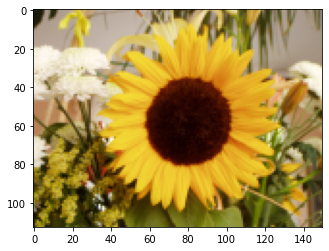

In [3]:
fig, ax = plt.subplots()
ax.imshow(img)

#### Estimate the location of a yellow petal pixel and print out its RGB components. You should see high green(close to 1.0) and red and low blue(close to 0.0). 

In [8]:
img[20,80,:]

array([0.91764706, 0.7254902 , 0.16078432], dtype=float32)

#### Use slicing to create a new img(numpy array) consists of the top left quarter of the image. Display this new image. 

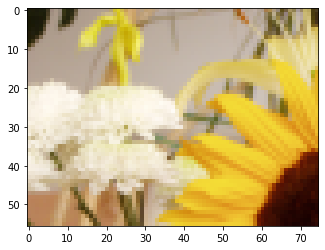

In [9]:
width = img.shape[1]
height = img.shape[0]
img_t = img[:height//2, :width//2, :]
fig, ax = plt.subplots()
ax.imshow(img_t)

#### Use slicing to crop out only the sunflower, removing all of the background. Try to get as close as possible. Display the new image. 

In [10]:
img_1 = img[10:100,35:130,:]

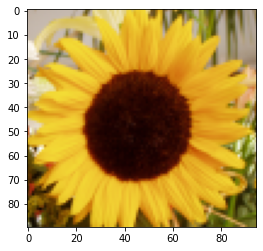

In [11]:
fig, ax = plt.subplots()
ax.imshow(img_1)

#### Use the code from the Lecture to extract and display each Red, Green and Blue componenent on separate Axes objects for the sunflower. 

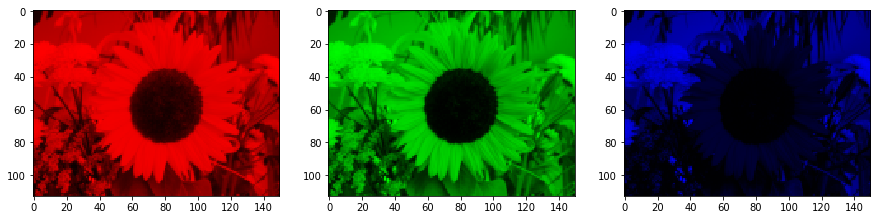

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i in range(3):
    temp = np.zeros(img.shape, dtype="float32")
    temp[:, :, i] = img[:, :, i]
    axs[i].imshow(temp)


#### Use the average method to convert the sunflower to grayscale. When display the image, use the keyword argument cmap="gray" in imshow() to specify the grayscale colormap.

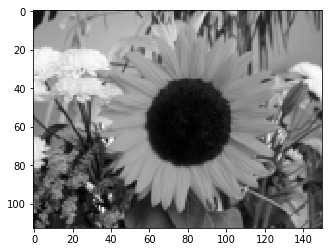

In [12]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
gray = (red + green + blue)/3 
fig, ax = plt.subplots()
ax.imshow(gray, cmap="gray")

#### Use the luminosity method to create the grayscale image. 

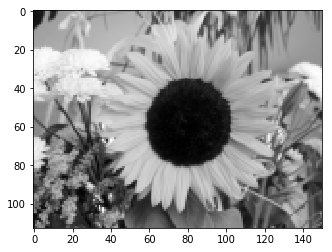

In [13]:
gray_lum = img[:,:,0]*.21 + img[:,:,1]*.72 + img[:,:,2]*.07 
fig, ax = plt.subplots()
ax.imshow(gray_lum, cmap="gray")

In [18]:
print(gray_lum[30,5])

0.9459216


#### To tint an image is to mix its colors with white. This will increase the lightness of the image. Write a Python function, which takes an image and a percentage value as a parameter. Setting 'percentage' to 0 will not change the image, setting it to one means that the image will be completely whitened.

#### For example, suppose a pixel with RGB components of [0.80, 0.60, 0.40]. Tinting it by 25% means that the pixel is now [0.85, 0.70, 0.55]. 

#### Hint: Use np.ones(shape). The formula for one pixel in the above example is:

tinted_pixel = [0.80, 0.60, 0.40] + ([1.0, 1.0, 1.0] - [0.80, 0.60, 0.40]) * 0.25

In [12]:
def tint(imag, percent):
    """
    imag: the image which will be tinted
    percent: a value between 0 (image will remain unchanged
             and 1 (image will completely white)
    """
    # just add one line of code.
    tinted_imag = imag + (np.ones(imag.shape) - img) * percent
    return tinted_imag


#### If your tint() function is written correctly above, run the code below to see the tinting at three different levels: 20%, 40%, 80%. Play around with different tint levels. 

Text(0.5, 1.0, 'Tinted 80%')

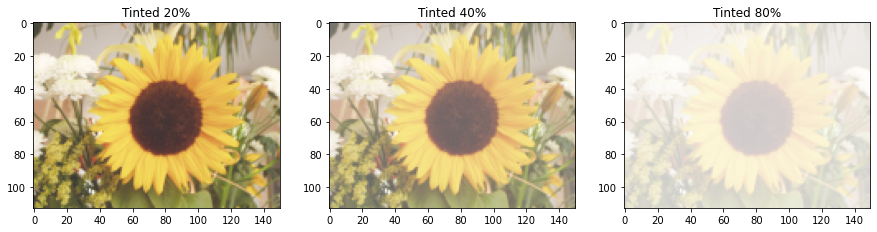

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
tinted_10 = tint(img, 0.20)
tinted_40 = tint(img, 0.40)
tinted_80 = tint(img, 0.80)
axs[0].imshow(tinted_10)
axs[0].set_title("Tinted 20%")
axs[1].imshow(tinted_40)
axs[1].set_title("Tinted 40%")
axs[2].imshow(tinted_80)
axs[2].set_title("Tinted 80%")
